<a href="https://colab.research.google.com/github/hackmashine/ml-ds-learning-journey/blob/main/Homework%201_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Road to learning ML is my story**

In [ ]:
!pip install pandas-datareader --quiet

import pandas as pd
from pandas_datareader import wb

# === Индикаторы ===
birth_rate_code = "SP.DYN.CBRT.IN"   # Birth rate (per 1000 people)
pop_code = "SP.POP.TOTL"             # Total population

# === Скачиваем ===
birth_rate = wb.download(indicator=birth_rate_code, country="all", start=1960, end=2022).reset_index()
birth_rate.rename(columns={birth_rate_code: "birth_rate"}, inplace=True)

population = wb.download(indicator=pop_code, country="all", start=1960, end=2022).reset_index()
population.rename(columns={pop_code: "population"}, inplace=True)

# === Объединяем ===
df = pd.merge(birth_rate, population, on=["country", "year"], how="inner")

# Считаем количество рождений
df["births"] = (df["birth_rate"] * df["population"]) / 1000
df["births"] = df["births"].round().astype("Int64")

# === Фильтруем только страны (убираем агрегированные регионы) ===
# У агрегатов в World Bank часто нет кода-ISO (3 буквы)
iso_list = wb.get_countries()
iso_countries = iso_list[iso_list["region"] != "Aggregates"]["name"].tolist()

df = df[df["country"].isin(iso_countries)].reset_index(drop=True)

# Итоговый вид
df = df[["year", "country", "births", "population", "birth_rate"]]

# Смотрим первые 20 строк
df.head(20)


/tmp/ipython-input-202487754.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  birth_rate = wb.download(indicator=birth_rate_code, country="all", start=1960, end=2022).reset_index()
/tmp/ipython-input-202487754.py:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  population = wb.download(indicator=pop_code, country="all", start=1960, end=2022).reset_index()


,year,country,births,population,birth_rate
0,2022,Afghanistan,1462664,40578842.0,36.045
1,2021,Afghanistan,1453695,40000412.0,36.342
2,2020,Afghanistan,1429964,39068979.0,36.601
3,2019,Afghanistan,1405901,37856121.0,37.138
4,2018,Afghanistan,1382420,36743039.0,37.624
5,2017,Afghanistan,1362282,35688935.0,38.171
6,2016,Afghanistan,1344024,34700612.0,38.732
7,2015,Afghanistan,1331754,33831764.0,39.364
8,2014,Afghanistan,1300092,32792523.0,39.646
9,2013,Afghanistan,1274015,31622704.0,40.288


In [ ]:
!pip install pandas-datareader --quiet

import pandas as pd
from pandas_datareader import wb

# === Индикаторы ===
birth_rate_code = "SP.DYN.CBRT.IN"   # Birth rate (per 1000 people)
pop_code = "SP.POP.TOTL"             # Total population

# === Скачиваем данные ===
birth_rate = wb.download(indicator=birth_rate_code, country="all", start=1960, end=2022).reset_index()
birth_rate.rename(columns={birth_rate_code: "birth_rate"}, inplace=True)

population = wb.download(indicator=pop_code, country="all", start=1960, end=2022).reset_index()
population.rename(columns={pop_code: "population"}, inplace=True)

# === Объединяем ===
df = pd.merge(birth_rate, population, on=["country", "year"], how="inner")

# === Считаем births ===
df["births"] = (df["birth_rate"] * df["population"]) / 1000
df["births"] = df["births"].round().astype("Int64")

# === Убираем агрегаты (оставляем только страны) ===
iso_list = wb.get_countries()
iso_countries = iso_list[iso_list["region"] != "Aggregates"]["name"].tolist()
df = df[df["country"].isin(iso_countries)].reset_index(drop=True)

# === Итоговый датасет ===
df = df[["year", "country", "births", "population", "birth_rate"]]

# === Сохраняем в CSV ===
df.to_csv("births_by_country.csv", index=False)

# Для скачивания на локалку
from google.colab import files
files.download("births_by_country.csv")

print("✅ Датасет сохранен: births_by_country.csv")
print("📊 Размер:", df.shape)


/tmp/ipython-input-123321211.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  birth_rate = wb.download(indicator=birth_rate_code, country="all", start=1960, end=2022).reset_index()
/tmp/ipython-input-123321211.py:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  population = wb.download(indicator=pop_code, country="all", start=1960, end=2022).reset_index()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Датасет сохранен: births_by_country.csv
📊 Размер: (13671, 5)


In [ ]:
import pandas as pd

# Загружаем датасет
data = pd.read_csv("births_by_country.csv")

def births_info_with_month(birth_date: str, top_n: int = 10):
    """
    birth_date: строка даты рождения (ДД.ММ.ГГГГ или YYYY-MM-DD)
    top_n: сколько стран показывать в топе
    """
    # Определяем год и месяц
    if "." in birth_date:
        d, m, y = birth_date.split(".")
        year, month = int(y), int(m)
    else:
        y, m, d = birth_date.split("-")
        year, month = int(y), int(m)

    # Фильтруем по году
    df_year = data[data["year"] == year]

    if df_year.empty:
        print(f"⚠️ Нет данных за {year}")
        return

    # Общие рождённые
    total_births_year = df_year["births"].sum()
    total_births_month = total_births_year / 12

    print(f"📅 Дата рождения: {birth_date}")
    print(f"👶 В {year} году в мире родилось ≈ {total_births_year:,.0f} человек")
    print(f"🍼 В {month}-м месяце {year} ≈ {total_births_month:,.0f} человек\n")

    # Топ стран
    top_countries = df_year.sort_values("births", ascending=False).head(top_n)
    print(f"🌍 Топ-{top_n} стран по числу рождений в {year} (и среднемесячные):")
    for i, row in top_countries.iterrows():
        births_country_year = row['births']
        births_country_month = births_country_year / 12
        print(f"   {row['country']}: {births_country_year:,.0f} за год (~{births_country_month:,.0f} в месяц)")

# === Тест ===
births_info_with_month("27.04.2001")


📅 Дата рождения: 27.04.2001
👶 В 2001 году в мире родилось ≈ 135,573,978 человек
🍼 В 4-м месяце 2001 ≈ 11,297,832 человек

🌍 Топ-10 стран по числу рождений в 2001 (и среднемесячные):
   India: 29,325,309 за год (~2,443,776 в месяц)
   China: 17,017,353 за год (~1,418,113 в месяц)
   Nigeria: 5,705,383 за год (~475,449 в месяц)
   Pakistan: 5,687,564 за год (~473,964 в месяц)
   Indonesia: 4,685,628 за год (~390,469 в месяц)
   United States: 4,018,062 за год (~334,838 в месяц)
   Bangladesh: 3,991,173 за год (~332,598 в месяц)
   Brazil: 3,382,339 за год (~281,862 в месяц)
   Ethiopia: 3,126,046 за год (~260,504 в месяц)
   Mexico: 2,380,256 за год (~198,355 в месяц)


📅 Дата рождения: 27.04.2001
👶 В 2001 году в мире родилось ≈ 135,573,978 человек
🍼 В 4-м месяце 2001 ≈ 11,297,832 человек

🌍 Топ-10 стран по числу рождений в 2001 (и среднемесячные):
   India: 29,325,309 за год (~2,443,776 в месяц)
   China: 17,017,353 за год (~1,418,113 в месяц)
   Nigeria: 5,705,383 за год (~475,449 в месяц)
   Pakistan: 5,687,564 за год (~473,964 в месяц)
   Indonesia: 4,685,628 за год (~390,469 в месяц)
   United States: 4,018,062 за год (~334,838 в месяц)
   Bangladesh: 3,991,173 за год (~332,598 в месяц)
   Brazil: 3,382,339 за год (~281,862 в месяц)
   Ethiopia: 3,126,046 за год (~260,504 в месяц)
   Mexico: 2,380,256 за год (~198,355 в месяц)


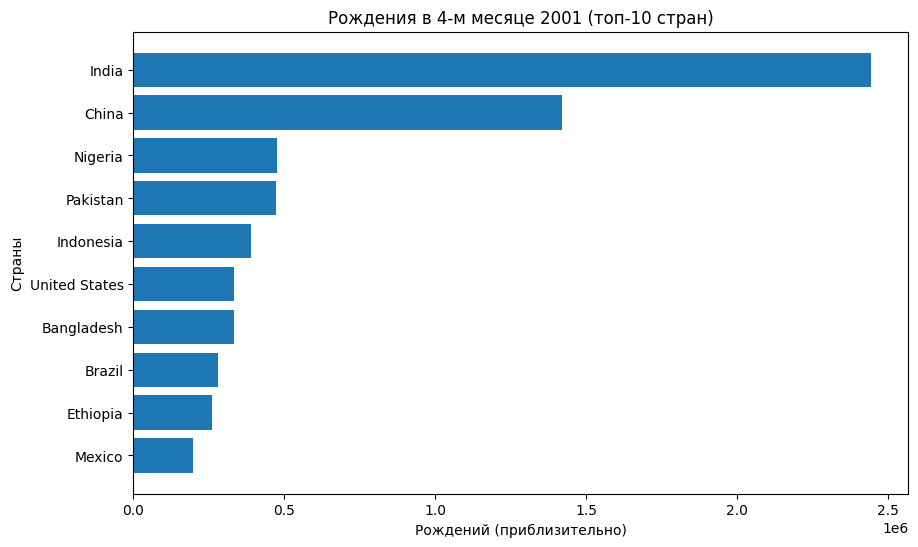

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем датасет (тот, что мы сохранили births_by_country.csv)
data = pd.read_csv("births_by_country.csv")

def births_info_with_month(birth_date: str, top_n: int = 10):
    """
    birth_date: строка даты рождения (ДД.ММ.ГГГГ или YYYY-MM-DD)
    top_n: сколько стран показывать в топе
    """
    # Определяем год и месяц
    if "." in birth_date:
        d, m, y = birth_date.split(".")
        year, month = int(y), int(m)
    else:
        y, m, d = birth_date.split("-")
        year, month = int(y), int(m)

    # Фильтруем по году
    df_year = data[data["year"] == year]

    if df_year.empty:
        print(f"⚠️ Нет данных за {year}")
        return

    # Общие рождённые
    total_births_year = df_year["births"].sum()
    total_births_month = total_births_year / 12

    print(f"📅 Дата рождения: {birth_date}")
    print(f"👶 В {year} году в мире родилось ≈ {total_births_year:,.0f} человек")
    print(f"🍼 В {month}-м месяце {year} ≈ {total_births_month:,.0f} человек\n")

    # Топ стран
    top_countries = df_year.sort_values("births", ascending=False).head(top_n)
    top_countries = top_countries.assign(births_month=top_countries["births"] / 12)

    print(f"🌍 Топ-{top_n} стран по числу рождений в {year} (и среднемесячные):")
    for i, row in top_countries.iterrows():
        print(f"   {row['country']}: {row['births']:,.0f} за год (~{row['births_month']:,.0f} в месяц)")

    # === Построение графика ===
    plt.figure(figsize=(10, 6))
    plt.barh(top_countries["country"], top_countries["births_month"])
    plt.gca().invert_yaxis()  # чтобы сверху была страна с максимальным числом рождений
    plt.title(f"Рождения в {month}-м месяце {year} (топ-{top_n} стран)")
    plt.xlabel("Рождений (приблизительно)")
    plt.ylabel("Страны")
    plt.show()

# === Тест ===
births_info_with_month("27.04.2001")


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display

# Загружаем датасет
data = pd.read_csv("births_by_country.csv").dropna(subset=["births", "population", "birth_rate"])

# Глобальная модель для прогноза рождаемости
X = data[["year", "population", "birth_rate"]]
y = data["births"]
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X, y)

# === функция прогноза ===
def predict_births(year, country):
    df_country = data[data["country"] == country].sort_values("year")
    if df_country.empty:
        print(f"⚠️ Нет данных по стране {country}")
        return

    last_year = df_country["year"].max()

    # если прогнозируем будущее → экстраполируем население и рождаемость
    if year > last_year:
        # модель для населения
        pop_model = LinearRegression().fit(df_country[["year"]], df_country["population"])
        population = pop_model.predict([[year]])[0]

        # модель для birth_rate
        br_model = LinearRegression().fit(df_country[["year"]], df_country["birth_rate"])
        birth_rate = br_model.predict([[year]])[0]
    else:
        # если год есть в данных → берём его напрямую
        row = df_country[df_country["year"] == year]
        if not row.empty:
            population = row.iloc[0]["population"]
            birth_rate = row.iloc[0]["birth_rate"]
        else:
            # ближайший год
            row = df_country.iloc[-1]
            population = row["population"]
            birth_rate = row["birth_rate"]

    # предсказание
    X_new = pd.DataFrame([[year, population, birth_rate]], columns=["year", "population", "birth_rate"])
    pred = model.predict(X_new)[0]

    # объяснение
    explanation = (
        f"Потому что в {country} в {year} году:\n"
        f"👥 Оценка населения ≈ {int(population):,} человек\n"
        f"👶 Коэффициент рождаемости ≈ {birth_rate:.2f} на 1000 человек\n"
        f"📈 Используется тренд (история {df_country['year'].min()}–{last_year})"
    )

    print(f"📅 Прогноз для {country} в {year}: ≈ {int(pred):,} рождений\n")
    print("❓ Почему так?\n" + explanation)

# === Виджеты ===
year_slider = widgets.IntSlider(
    value=2025, min=1960, max=2100, step=1,
    description="Год:"
)
country_dropdown = widgets.Dropdown(
    options=sorted(data["country"].unique()),
    description="Страна:"
)
button = widgets.Button(description="Сделать прогноз")
output = widgets.Output()

def on_button_click(b):
    output.clear_output()
    with output:
        predict_births(year_slider.value, country_dropdown.value)

button.on_click(on_button_click)
display(year_slider, country_dropdown, button, output)


IntSlider(value=2025, description='Год:', max=2100, min=1960)

Dropdown(description='Страна:', options=('Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'An…

Button(description='Сделать прогноз', style=ButtonStyle())

Output()

Сумма чисел от 1 до 100: 5050
Среднее значение: 50.5

Таблица студентов:
     Имя  Математика  Английский  Информатика
0    Аня           5           4            5
1  Борис           3           5            4
2   Вика           4           4            5

Средняя оценка по предметам:
Математика     4.000000
Английский     4.333333
Информатика    4.666667
dtype: float64

Средняя оценка каждого студента:
Имя
Аня      4.666667
Борис    4.000000
Вика     4.333333
dtype: float64


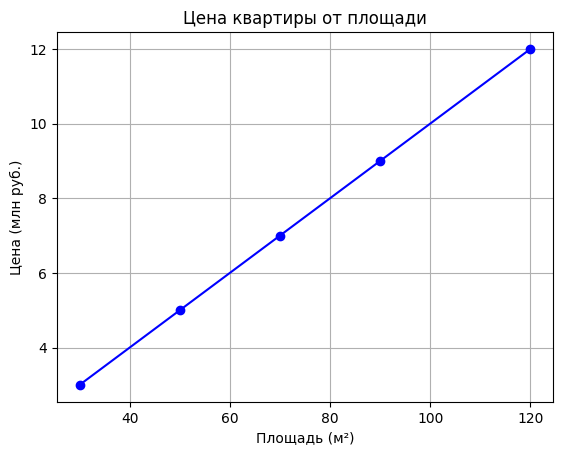

In [ ]:
# ===============================
# Домашнее задание №1
# Основы Python, Pandas и Matplotlib
# ===============================

# --- Часть 1. Python ---
# Создай список чисел от 1 до 100
numbers = list(range(1, 101))

# Сумма всех чисел
total_sum = sum(numbers)

# Среднее значение
average = total_sum / len(numbers)

print("Сумма чисел от 1 до 100:", total_sum)
print("Среднее значение:", average)


# --- Часть 2. Pandas ---
import pandas as pd

# Создаём таблицу со студентами и оценками
data = pd.DataFrame({
    "Имя": ["Аня", "Борис", "Вика"],
    "Математика": [5, 3, 4],
    "Английский": [4, 5, 4],
    "Информатика": [5, 4, 5]
})

print("\nТаблица студентов:")
print(data)

# Средняя оценка по предметам
print("\nСредняя оценка по предметам:")
print(data.mean(numeric_only=True))

# Средняя оценка по каждому студенту
print("\nСредняя оценка каждого студента:")
print(data.set_index("Имя").mean(axis=1))


# --- Часть 3. Matplotlib ---
import matplotlib.pyplot as plt

# Данные: площадь квартиры и цена
X = [30, 50, 70, 90, 120]
y = [3, 5, 7, 9, 12]

plt.plot(X, y, marker="o", color="blue")
plt.xlabel("Площадь (м²)")
plt.ylabel("Цена (млн руб.)")
plt.title("Цена квартиры от площади")
plt.grid(True)
plt.show()
